In [11]:
import sys
sys.path.insert(0, '../..')

import numpy as np
import torch
from torch import Tensor
import gym

import time

from tqdm import trange, tqdm

import matplotlib.pyplot as plt

from coltra.agents import CAgent
from coltra.envs import MultiGymEnv
from coltra.collectors import collect_crowd_data

import seaborn as sns

In [12]:
def discount_gae(rewards: Tensor, values: Tensor, dones: Tensor, γ: float = 0.99, λ: float = 0.95):

    advantages = torch.zeros_like(rewards)
    lastgaelam = 0
    buffer_size = rewards.shape[0]

    for t in reversed(range(buffer_size)):
        if t == buffer_size - 1:
            nextnonterminal = 0.
            nextvalues = 0.
        else:
            nextnonterminal = 1.0 - dones[t + 1]
            nextvalues = values[t + 1]
        delta = rewards[t] + γ * nextvalues * nextnonterminal - values[t]
        advantages[t] = lastgaelam = delta + γ * λ * nextnonterminal * lastgaelam

    returns = advantages + values

    return returns, advantages

In [ ]:
di

In [2]:
agent = CAgent.load_agent("/Users/redtachyon/tb_logs/pendulum_test_2021-08-24_12-59-22", -1)

In [3]:
env = MultiGymEnv("Pendulum-v0")

In [7]:
data, metrics = collect_crowd_data(agent, env, 1000, disable_tqdm=False)

100%|██████████| 1000/1000 [00:00<00:00, 2305.67it/s]


In [8]:
env = gym.make("Acrobot-v1")

In [9]:
env.action_space


Discrete(3)

In [14]:
data.done

tensor([False, False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, 

In [58]:
obs = env.reset()['agent']
actions = []
for _ in trange(199):
    action, _, _ = agent.act(obs)
    actions.append(action.continuous)
    obs, reward, done, info = env.step(env._dict(action))
    obs = obs['agent']
#     env.render()
#     time.sleep(0.1)

100%|██████████| 199/199 [00:00<00:00, 3011.28it/s]


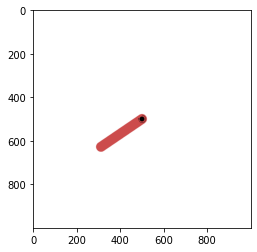

In [59]:
plt.imshow(env.render(mode="rgb_array"))

In [60]:
action, _, _ = agent.act(obs)
actions.append(action.continuous)
obs, reward, done, info = env.step(env._dict(action))
obs = obs['agent']

print(done)

{'agent': True}


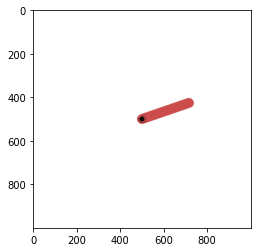

In [61]:
plt.imshow(env.render(mode="rgb_array"))

/Users/redtachyon/anaconda3/envs/crowd/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

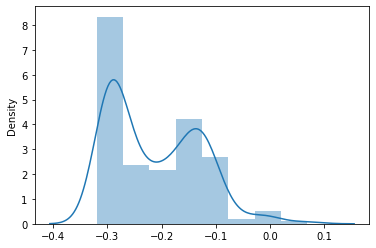

In [39]:
sns.distplot(np.array(actions))

In [22]:
env.close()

In [14]:
agent.act(obs['agent'])

(Action(continuous=array([0.16374116], dtype=float32), discrete=None), (), {})